In [353]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')





from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

# EDA

In [354]:
# Load the Data
df = pd.read_csv("Data_inc.csv")
df

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,NaN
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,NaN
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,NaN
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,NaN


In [355]:
# Shape of the data

df.shape

(32561, 16)

In [356]:
# Check the null values
df.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
 Education              0
 Education-num          0
 marital-status         0
 occupation             0
 relationship           0
 race                   0
Gender                  0
 capital-gain           0
 capital-loss           0
 hours-per-week         0
 country                0
 income                 0
Unnamed: 15         32559
dtype: int64

#### In this Dataframe, there are 16 columns and one column named "unnamed : 15" that contains all NaN values. We are removing that column

In [357]:
# Drop unnamed column

df.drop('Unnamed: 15', axis=1, inplace=True)

In [358]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [359]:
df.shape

(32561, 15)

In [360]:
# See All columns of the dataset
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

#### There is some extra space in most of the column name so we have to remove this

In [361]:

new_columns = []
for cols in df.columns:
    new_cols = cols.replace(' ', '')
    new_columns.append(new_cols)
df.columns = new_columns

In [362]:
df.columns

Index(['Age', 'ProfessionClass', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [363]:
# Check the null values
df.isnull().sum()

Age                0
ProfessionClass    0
Final_census       0
Education          0
Education-num      0
marital-status     0
occupation         0
relationship       0
race               0
Gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
country            0
income             0
dtype: int64

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   ProfessionClass  32561 non-null  object
 2   Final_census     32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   Gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  country          32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [365]:
# Some Stats of the dataset

df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [366]:
# Object type data stats
df.describe(include=['object'])

,ProfessionClass,Education,marital-status,occupation,relationship,race,Gender,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [367]:
# Let's check the repartition between male and female

In [368]:
df.Gender.value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

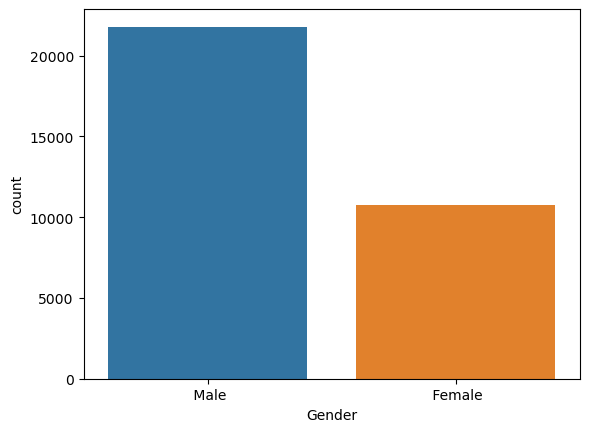

In [369]:
sns.countplot(x="Gender", data=df)

In [370]:
# Let's check the race's repartition

In [371]:
df.race.value_counts()


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

<Axes: xlabel='race', ylabel='count'>

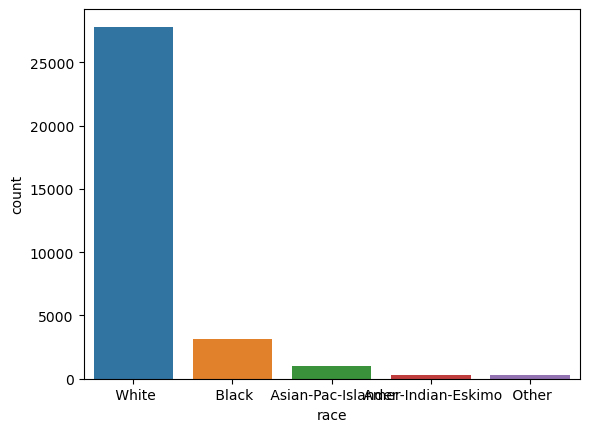

In [372]:
sns.countplot(x="race", data=df)

In [373]:
# Reformating the target columns   
# in '1' and '0' from 

# there is extra space in the income column values

In [374]:
df['income'] = df['income'].str.strip()     # Removeing the extrqa space in the all values in the inome column


In [375]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [376]:
df

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [377]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

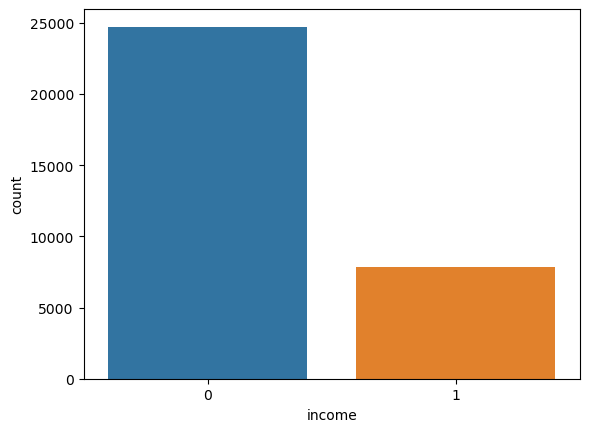

In [378]:
sns.countplot(x="income", data=df)


In [379]:
# Identify Numeric features
numeric_features = ['Age','Final_census','Education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['ProfessionClass','Education','marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country']

<Axes: ylabel='Frequency'>

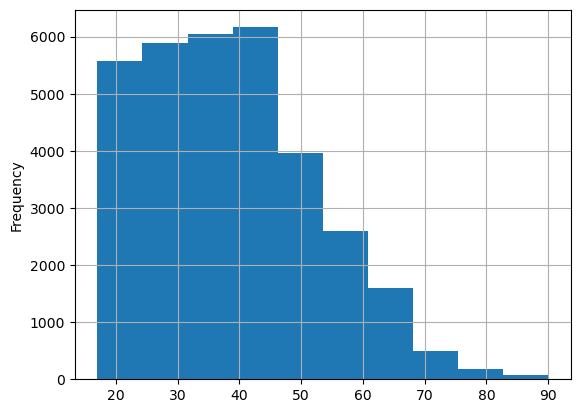

In [380]:
df.Age.plot.hist(grid=True)

<Axes: ylabel='Frequency'>

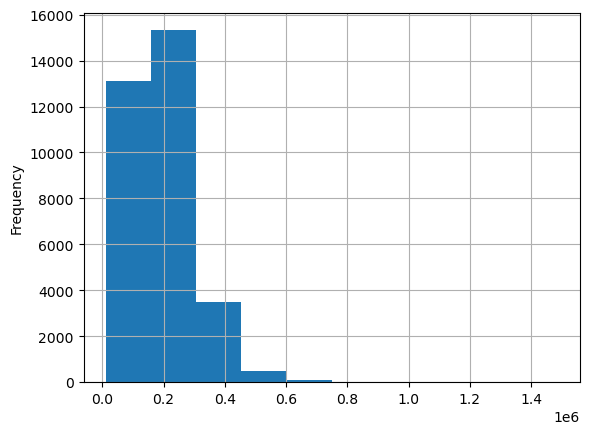

In [381]:
df.Final_census.plot.hist(grid=True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final_census'}>,
        <Axes: title={'center': 'Education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

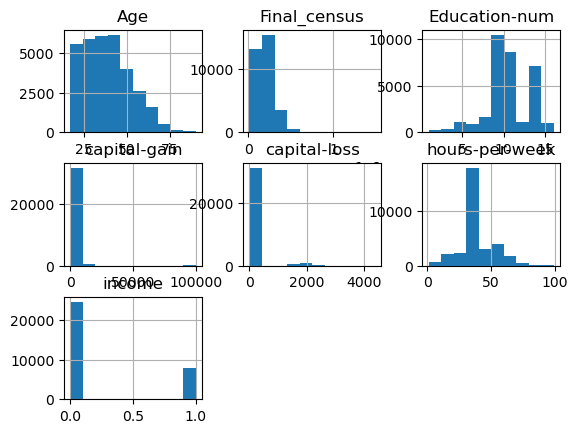

In [382]:
df[numeric_features].hist()

### Correlation

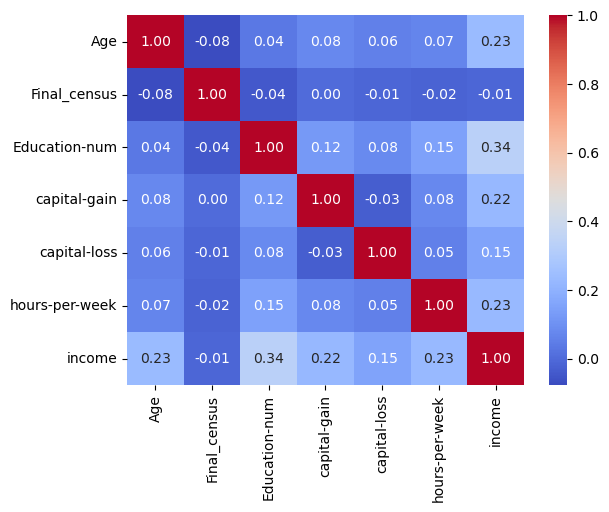

In [383]:
# Correlation Heat Map
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [384]:
df['Education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-num, dtype: int64

<Axes: xlabel='Education-num', ylabel='count'>

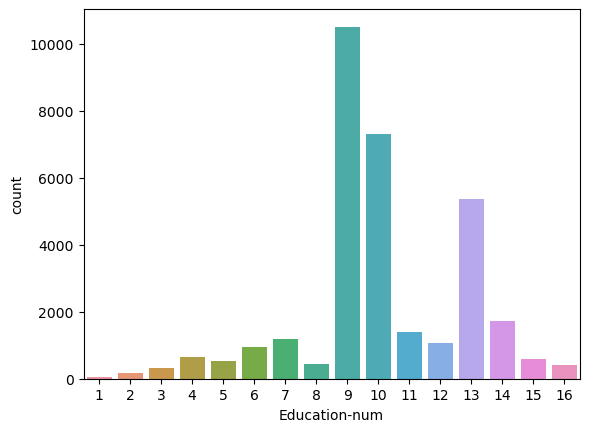

In [385]:
sns.countplot(x="Education-num", data=df)

<Axes: xlabel='Gender', ylabel='count'>

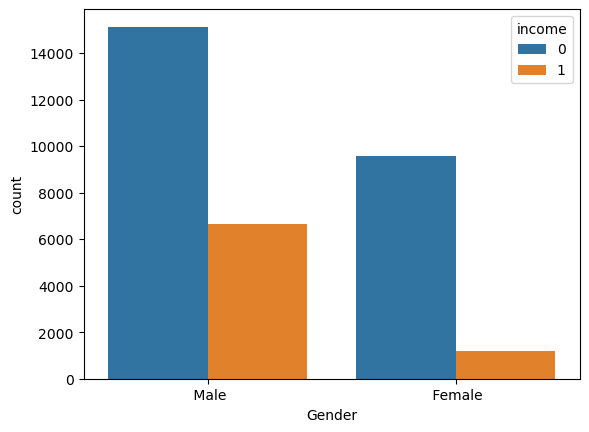

In [386]:
### income acc. to gender

sns.countplot(x="Gender", hue="income", data=df)

In [387]:
#Finding the special characters in the data frame 
df.isin([' ?']).sum(axis=0)

Age                   0
ProfessionClass    1836
Final_census          0
Education             0
Education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
Gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
country             583
income                0
dtype: int64

In [388]:
# Replace the '?' in NaN values
df.replace(' ?', np.NaN,inplace = True)
df.head()

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [389]:
df.isin([' ?']).sum(axis=0)

Age                0
ProfessionClass    0
Final_census       0
Education          0
Education-num      0
marital-status     0
occupation         0
relationship       0
race               0
Gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
country            0
income             0
dtype: int64

In [390]:
# Again check the NaN values
df.isnull().sum()

Age                   0
ProfessionClass    1836
Final_census          0
Education             0
Education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
Gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
country             583
income                0
dtype: int64

In [391]:
# Fill NaN values Forward Fill method 
df.fillna(method = 'ffill', inplace = True)
df.head(3)

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [392]:
df.isnull().sum()  

Age                0
ProfessionClass    0
Final_census       0
Education          0
Education-num      0
marital-status     0
occupation         0
relationship       0
race               0
Gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
country            0
income             0
dtype: int64

#### confirm we dont have null or '?' data

### Handling categorical features 
### Label incoder


In [393]:
df.head(2)

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [394]:
# Drop 2 columns , these cloumns not so usefull to predict the target column (income)
df.drop(['Final_census', 'Education'], axis=1, inplace=True)

In [395]:
df.head(2)

,Age,ProfessionClass,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [396]:
df.shape

(32561, 13)

In [397]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ProfessionClass'] = le.fit_transform(df['ProfessionClass'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['Gender'] = le.fit_transform(df['Gender'])
df['country'] = le.fit_transform(df['country'])
df['income'] = le.fit_transform(df['income'])

In [398]:
df.head()

,Age,ProfessionClass,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [399]:
## Incode all data

In [400]:
df.tail()

,Age,ProfessionClass,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,9,4,0,3,4,1,0,0,20,38,0
32560,52,4,9,2,3,5,4,0,15024,0,40,38,1


<Axes: >

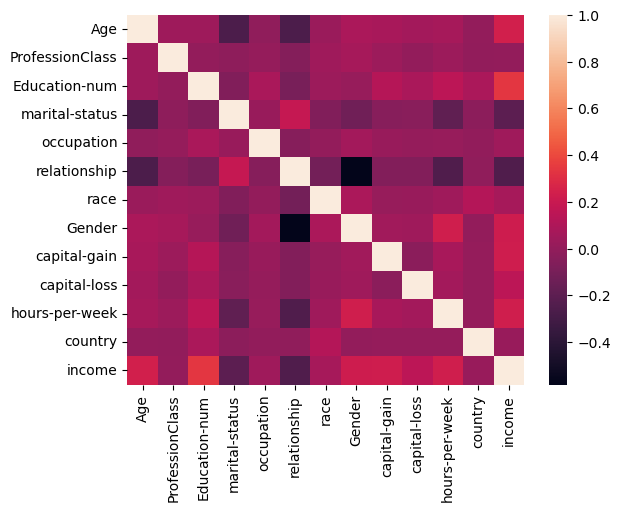

In [401]:
sns.heatmap(df.corr())

In [402]:
## all the column are whelky co realted than we can move forward 


#  Model Bulding 

In [403]:
# Drop Target column and store in other variable
x = df.drop(['income'], axis = 1)
y = df['income']

### Logistic Regression

In [404]:
## Logistic Regression is one of the easiest and most commonly used supervised Machine learning algorithms for categorical classification. The basic fundamental concepts of Logistic Regression are easy to understand and can be used as a baseline algorithm for any binary (0 or 1) classification problem.

In [405]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [406]:
print("x shape : ", x.shape)
print("y shape : ", y.shape)

x shape :  (32561, 12)
y shape :  (32561,)


In [407]:
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("===============================")
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (26048, 12)
x_test shape :  (6513, 12)
y_train shape :  (26048,)
y_test shape :  (6513,)


In [408]:
y_train.value_counts()

0    19778
1     6270
Name: income, dtype: int64

In [409]:
y_test.value_counts()

0    4942
1    1571
Name: income, dtype: int64

In [410]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
#Train our model with the training data
LR.fit(x_train, y_train)

LogisticRegression()

In [411]:
#print our price predictions on our test data
pred_log = LR.predict(x_test)

In [412]:
accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

In [413]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")

The accuracy of the model is 81.10000000000001 %


In [414]:
auc_log = roc_auc_score(y_test, LR.predict_proba(x_test)[:,1])
print(f"The AUC Score  is {round(auc_log,3)*100} %")


The AUC Score  is 82.19999999999999 %


In [415]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [416]:

print(classification_report(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))
print(accuracy_score(y_test,pred_log)*100)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4942
           1       0.70      0.38      0.49      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.69      6513
weighted avg       0.80      0.81      0.79      6513

[[4685  257]
 [ 975  596]]
81.08398587440504


## Decision Tree

In [417]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

In [418]:
# Train Decision Tree Classifer
clf.fit(x_train,y_train)
prediction_clf = clf.predict(x_test)

In [419]:
accuracy_dec_tree = metrics.accuracy_score(y_test, prediction_clf)

In [420]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,prediction_clf),3)*100} %")

The accuracy of the model is 85.6 %


In [421]:
auc_clf = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print(f"The AUC Score  is {round(auc_clf,3)*100} %")


The AUC Score  is 90.2 %


### Random Forest

In [422]:
RF=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
RF.fit(x_train,y_train)
predict_rf =RF.predict(x_test)

In [423]:
accuracy_rf = metrics.accuracy_score(y_test, predict_rf)

In [424]:
print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,predict_rf),3)*100} %")

The accuracy of the model is 86.9 %


In [425]:
auc_rf = roc_auc_score(y_test, RF.predict_proba(x_test)[:,1])
print(f"The AUC Score  is {round(auc_rf,3)*100} %")

The AUC Score  is 91.9 %


In [426]:

print(classification_report(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print(accuracy_score(y_test,predict_rf)*100)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4942
           1       0.78      0.64      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

[[4653  289]
 [ 565 1006]]
86.88776293566713
